In [487]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Probability

Probability plotting function defined to visualize multiple probability scenarios below:

In [293]:
def probability_plot(function,start, increment, threshold0, threshold1, title):
    figure(figsize=(10, 10)) #setting figure size
    i = start #intializing our "N"
    prob = function(i) #probability variable
    problist = [] #saving probabilities for plotting
    incrementlist = [] #saving increments for plotting
    
    while threshold0 < prob < threshold1: 
    #"Continue while our probability is within this threshold"
    #*Would be better implemented as threshold of difference in probability between iterations
    #e.g. continue while difference between iterations is less than 10%. But this works for now. :)
        prob = function(i)
        problist.append(prob)
        incrementlist.append(i)
        plt.scatter(i,prob)
        i += increment
        
    
    plt.plot(incrementlist,problist)
    plt.xlabel("N", fontsize=15)
    plt.ylabel("Probability",fontsize=15)
    plt.title(title)
    
    result = int(i/increment) 
    #Used to display resulting convergance corrected for increment
    return "Convergence at N =", result*increment

**Die Cast Problem:**

Given 2 fair, 6-sided die, what is the probability that the sum of the die rolled is 6?

In [367]:
(1/36)*5 #5 possible ways to get 6 from 2, 6 faced die.

0.1388888888888889

**Birthday Problem:**

Given k people in a room, what is the probability distribution of **no 2 people** having the same birthday? Holding day count for a year at 365. 

Implemented using:
$$\frac{365!}{365^n\times(365-n)!}$$

Which can be interpreted as:
$$\frac{365 \times 364\, \times ... \times \, (365-n+1)} {365^n}$$
where each successive person in the group cannot have the same birthday as the last person

In [336]:
#first with 20 people
bdproblem = lambda x: (math.factorial(365) // math.factorial(365-x))/(365**x)
bdproblem(20)

0.5885616164194201

('Convergence at N =', 71)

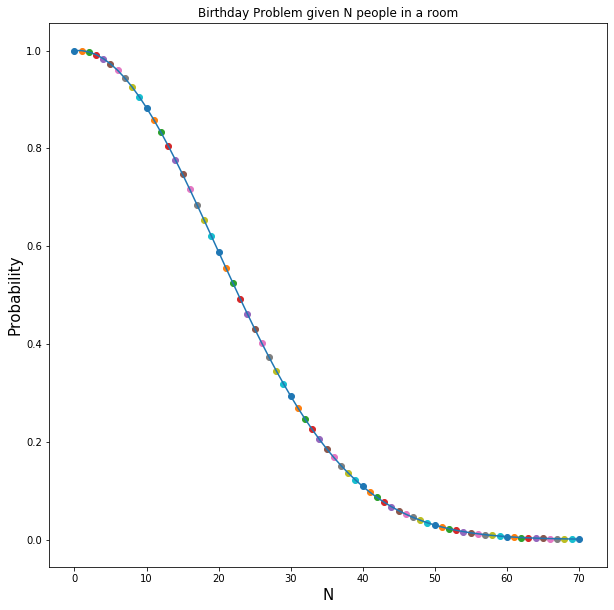

In [372]:
probability_plot(bdproblem,0,1, .001,1.1, "Birthday Problem given N people in a room")

**Sampling with Replacement:**

From a bag of 10 items, an item is selected one by one, 10 times, with replacement. What is the probability any given item does not get selected? 

In [374]:
#first with 10 items
n = 10
sampleWReplacement = lambda x: ((x-1)/x)**x
sampleWReplacement(n)

0.3486784401000001

('Convergence at N =', 24.0)

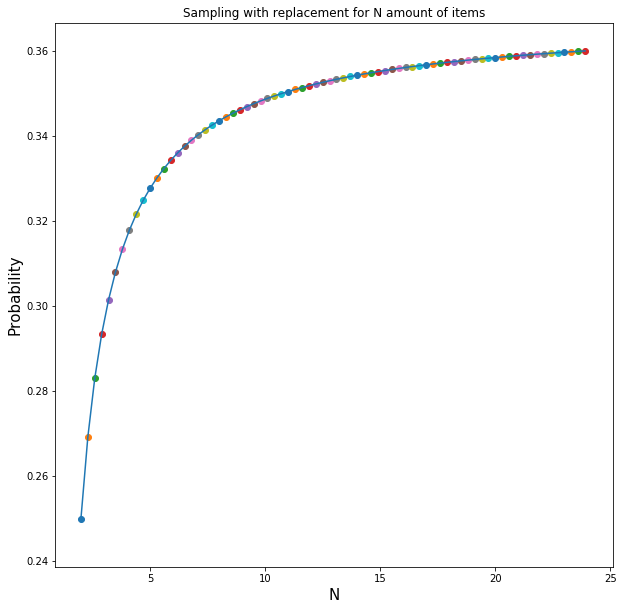

In [371]:
probability_plot(sampleWReplacement, 2, .3 ,0,.36, "Sampling with replacement for N amount of items")

**Conditional Probability Problem:**

1. Fair coin (2-sides) tossed n times
2. 1 of the 5 tosses was a head, 
3. What is the probability that there were exactly 3 heads?

Implementing using ```event space / sample space``` where:
$$Event = {n \choose 3} = \frac{n!}{3!\times n-3!}$$
$$Sample = (2^n)-1$$

In [434]:
#first with 5 tosses
cointoss = lambda n: (math.factorial(n)/(math.factorial(3)*(math.factorial(n - 3))))/((2**n)-1)
cointoss(7)

0.2755905511811024

('Convergence at N =', 22)

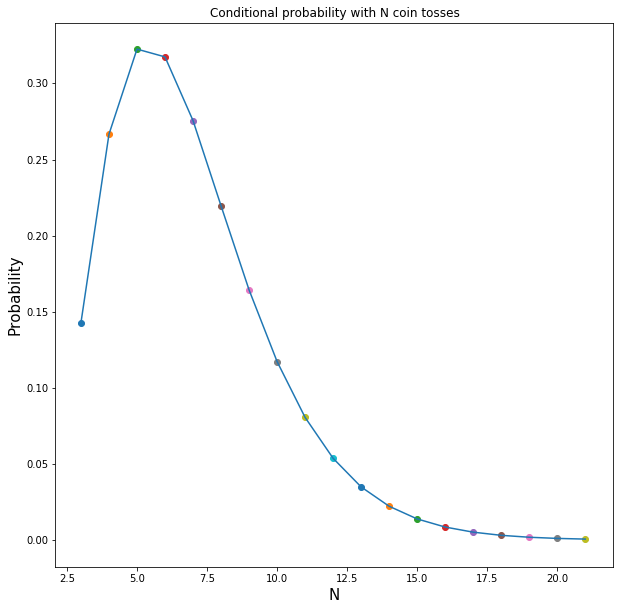

In [438]:
probability_plot(cointoss, 3, 1, .001, 1, "Conditional probability with N coin tosses")

**Conditional Probability- Bayes Theorem**

In a particular hospital during flu season, it was observed that 10% of the patients had a cold. Among the 10% of patients who had a cold, 80% had the flu. Among the 90% of patients who did not have a cold, 5% had the flu. Given that a particular patient had the flu, what is the probability that he had a cold?

i.e.:
1. A hospital observes 10% of patients had "cold"
2. Among the 10% with "cold", 80% also had "flu" 
3. Among the other 90% who did not have "cold", only 5% had "flu".

What is the probability of a particular patient having "cold" given that they had "flu"?

Implementing using Bayes Theorem:
$$P(A|B) = \frac{P(B|A)\times P(A)} {P(B)}$$

where to find P(B) (for Flu) we use Total Probability on (1) and (2) above:
$$P(A) = P(A|B_x) \times P(B_x) + P(A|B_y) \times P(B_y)$$

1. P(A) = P(C) = Probabiliy of having "Cold" = .1
2. P(B) = P(F) = Probability of having "Flu" = .1*.8+.9*.05
3. P(B|A) = P(F|C) = Probability of having "Flu", given that one has "Cold" = .8
4. We're looking for P(C|F)

In [800]:
(.8*.1)/(.1*.8+.9*.05)

0.64

### Linear Algebra

In [478]:
import numpy.linalg as npl

**Matrix Multiplication**

In [470]:
A = np.vstack([[1,3,-3],[3,0,5]])
B = np.vstack([[3,-3,0],[0,1,5]]).T
A@B

array([[ -6, -12],
       [  9,  25]])

**Matrix Transpose**

If A and B are both of size $n \times n$:
$$ det(AB) = det(B^TA^T) $$
$$ (A+B)^T = B^T + A^T $$
$$ AA^T :: symmetric $$

In [500]:
#dummy matrices of size nxn where n = 2
A = np.vstack([[9,3],[7,2]])
B = np.vstack([[5,6],[2,0]])
A
B

array([[9, 3],
       [7, 2]])

array([[5, 6],
       [2, 0]])

In [501]:
# Same:
npl.det(A@B)
npl.det(B.T@A.T)

36.00000000000014

35.99999999999995

In [502]:
#Same:
(A+B).T
B.T+A.T

array([[14,  9],
       [ 9,  2]])

array([[14,  9],
       [ 9,  2]])

In [503]:
#Symmetric: 
A@A.T

array([[90, 69],
       [69, 53]])

In [504]:
#Not the same:
(A.T@(B@A)).T
A@B.T@A.T

array([[909, 297],
       [285,  93]])

array([[621, 477],
       [465, 357]])

**Matrix Transpose**

In [509]:
npl.inv((A.T))
(npl.inv(A)).T

array([[-0.66666667,  2.33333333],
       [ 1.        , -3.        ]])

array([[-0.66666667,  2.33333333],
       [ 1.        , -3.        ]])

**Matrix Operations**

In [510]:
A = np.vstack([[1,-1,0,0],[2,-1,0,0],[0,0,1,0],[-1,1,0,1]])
A

array([[ 1, -1,  0,  0],
       [ 2, -1,  0,  0],
       [ 0,  0,  1,  0],
       [-1,  1,  0,  1]])

In [529]:
#Checking dependence via eigenvalues:
lambdas, V =  npl.eig(A)
# The linearly dependent column vectors would be:
print (A[lambdas == 0,:], "There are none, therefore columns aren't linearly dependent")

[] None, therefore columns aren't linearly dependent


In [526]:
npl.det(A), "Determinant is not -1"

(1.0, 'Determinant is not -1')

In [528]:
npl.inv(A), "Matrix is invertible"

(array([[-1.,  1.,  0.,  0.],
        [-2.,  1., -0., -0.],
        [ 0.,  0.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]]), 'Matrix is invertible')

**Eigen Analysis**

In [530]:
A = np.vstack([[5,6,17],[0,-19,23],[0,0,37]])
A

array([[  5,   6,  17],
       [  0, -19,  23],
       [  0,   0,  37]])

In [533]:
npl.eig(A)[0]

array([  5., -19.,  37.])

In [534]:
A = np.vstack([[8,-4,2],[4,0,2],[0,-2,-3]])
x = np.vstack([-4.5,-4,1])
A
x

array([[ 8, -4,  2],
       [ 4,  0,  2],
       [ 0, -2, -3]])

array([[-4.5],
       [-4. ],
       [ 1. ]])

In [544]:
npl.matrix_power(A,5)@x

array([[-4342.],
       [-3830.],
       [ 1113.]])

### Calculus

Q1 solved via substitution of x and 2y

Q2 visualizations:

/Users/vb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Text(0.5, 1.0, 'Only $X^2$ is convex')

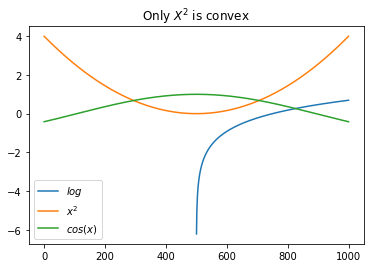

In [589]:
x = numpy.linspace(-2,2,1000)
plt.plot(np.log(x))
plt.plot(x**2)
plt.plot(np.cos(x))
plt.legend([r"$log$",r"$x^2$", r"$cos(x)$"])
plt.title(r"Only $X^2$ is convex")

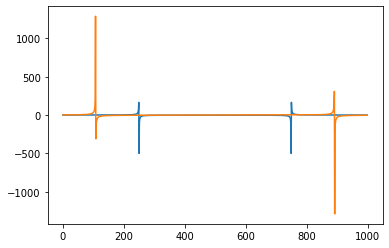

In [590]:
plt.plot(1/(x**2-1))
plt.plot(np.tan(x))

**Hessian Matrix**

Given:
$$f(x,y) = x^2sin(y) - y^3cos(x)$$
Calculate it's:
$$H = \begin{bmatrix}
    \frac{\partial^2f}{\partial x^2} & \frac{\partial^2f}{\partial y \partial x} & \\
    \frac{\partial^2f}{\partial x \partial y} & \frac{\partial^2f}{\partial y^2}
    \end{bmatrix}$$

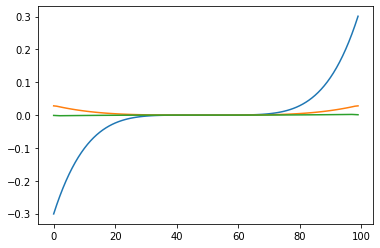

In [666]:
#Visualizing a second order derivative of this form
x = numpy.linspace(-1,1,100)
y = numpy.linspace(-1,1,100)
fxy = lambda x,y: x**2*np.sin(y) - y**3*np.cos(x)
plt.plot(fxy(x,y))
plt.plot(np.gradient(fxy(x,y)))
plt.plot(np.gradient(np.gradient(fxy(x,y))))

In [758]:
from sympy import * 
from sympy.abc import x,y,z
#Q3:
f = x**2*(sin(y)) - y**3*(cos(x))
hess = hessian(f, (x,y))
hess

Matrix([
[    y**3*cos(x) + 2*sin(y), 2*x*cos(y) + 3*y**2*sin(x)],
[2*x*cos(y) + 3*y**2*sin(x),  -x**2*sin(y) - 6*y*cos(x)]])

**Q4-8:**
1. 4 and 6 are skipped because they are more about identities than the rest.
2. see https://us.edstem.org/courses/106/discussion/1798 for more content on 6.

In [759]:
#Q5:
f = x + y**2 + x*z
q5 = [diff(f,(x)),diff(f,(y)),diff(f,(z))]
q5

[z + 1, 2*y, x]

-exp(-x)

1

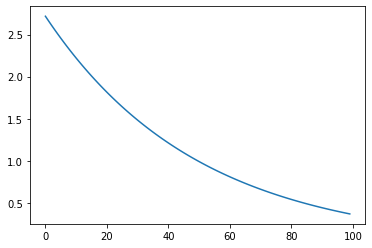

In [756]:
#Q7
from sympy.abc import x,y,z
diff(exp(-x))
limit(-exp(-x)+exp(0),x,oo) #Not sure where the answer got the +exp(0) term from.
x = np.linspace(-1,1,100)
plt.plot(math.e**-x)

**Saddle Point**

Text(0.5, 0.92, '$x^2-y^2$')

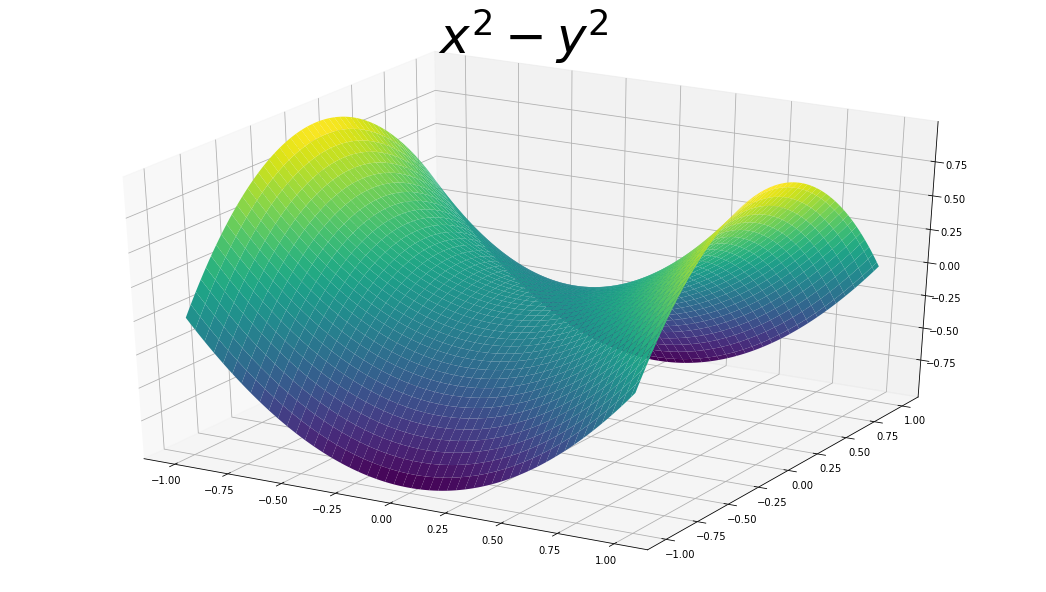

In [711]:
#Q8
from mpl_toolkits.mplot3d import Axes3D
X,Y = np.meshgrid(numpy.linspace(-1,1,100),numpy.linspace(-1,1,100))
z = X**2-Y**2

fig = plt.figure(figsize=(18.5,10.5))
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,z, cmap="viridis")
plt.title(r"$x^2-y^2$", fontsize=50)